In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import FileUpload, ImageClassifierCleaner

In [2]:
path = Path.cwd()/"../datasets/Potato"
peach_path =path/'../Peach'

In [12]:
dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        get_y=parent_label,
        item_tfms=Resize(400),
        batch_tfms=aug_transforms(),
        splitter=RandomSplitter(.2, seed=42)
    )

potato = dls.dataloaders(path)

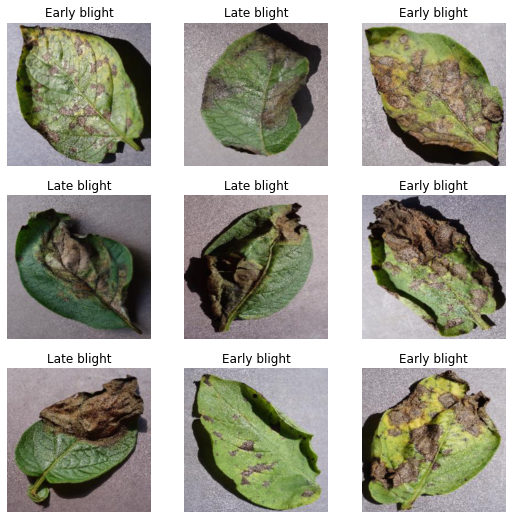

In [13]:
potato.valid.show_batch()

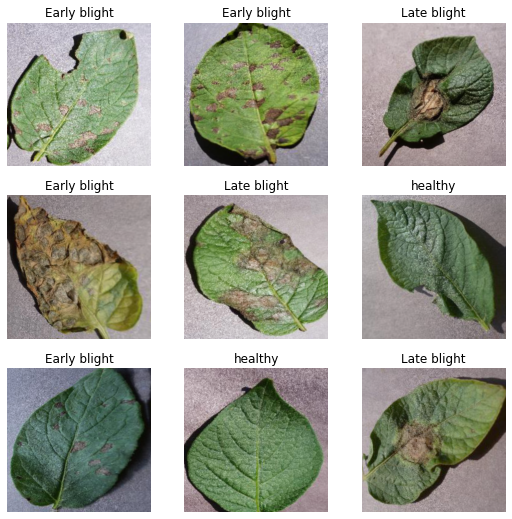

In [14]:
potato.train.show_batch()

In [15]:
model = cnn_learner(potato, resnet34, metrics=[accuracy, error_rate])

In [16]:
model.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.609502,0.095282,0.962791,0.037209,00:41


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.110425,0.069921,0.974419,0.025581,00:50
1,0.080190,0.011938,0.997674,0.002326,00:48
2,0.056858,0.043622,0.983721,0.016279,00:49
3,0.040077,0.002907,0.997674,0.002326,00:49
4,0.027569,0.005514,0.997674,0.002326,00:48
5,0.020998,0.020466,0.995349,0.004651,00:49
6,0.014057,0.015624,0.995349,0.004651,00:49
7,0.011557,0.003532,0.997674,0.002326,00:49
8,0.009782,0.004934,0.997674,0.002326,00:49
9,0.009111,0.003721,0.997674,0.002326,00:49


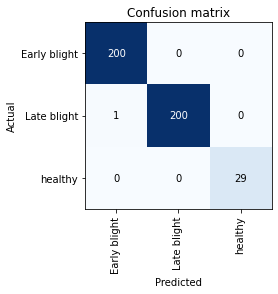

In [17]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [21]:
cleaner = ImageClassifierCleaner(model)

In [22]:
cleaner

In [28]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [29]:
for idx, cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), path/'../cat')

In [31]:
model.export(Path.cwd()/"../models/potato.pkl")

In [32]:
btn = FileUpload()
btn

FileUpload(value={}, description='Upload')

In [33]:
model.predict(btn.data[0])

('healthy', tensor(2), tensor([0.0027, 0.1759, 0.8215]))

In [34]:
(Path.cwd()/"../models").ls()

(#7) [Path('/home/fastai-2020-lalkrishna/My-files/Projects/../models/leaf-diseases-classifier.pkl'),Path('/home/fastai-2020-lalkrishna/My-files/Projects/../models/bear.pkl'),Path('/home/fastai-2020-lalkrishna/My-files/Projects/../models/.ipynb_checkpoints'),Path('/home/fastai-2020-lalkrishna/My-files/Projects/../models/leaf-diseases-classifier-v2.pkl'),Path('/home/fastai-2020-lalkrishna/My-files/Projects/../models/grapes.pkl'),Path('/home/fastai-2020-lalkrishna/My-files/Projects/../models/potato.pkl'),Path('/home/fastai-2020-lalkrishna/My-files/Projects/../models/tomato.pkl')]

## Peach

In [17]:
dls_peach =  DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        get_y=parent_label,
        item_tfms=Resize(400),
        batch_tfms=aug_transforms(),
        splitter=RandomSplitter(.2, seed=42)
    )

peach = dls_peach.dataloaders(peach_path)

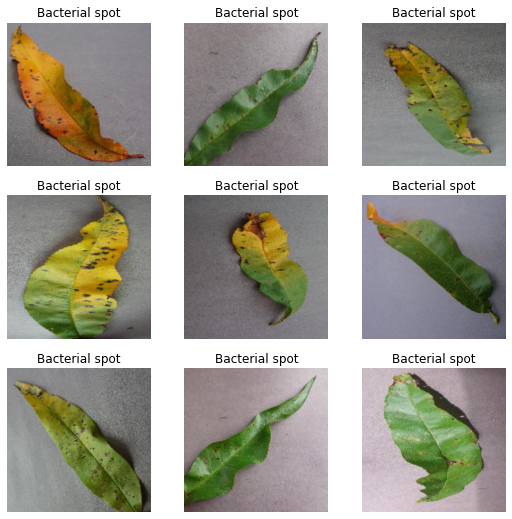

In [18]:
peach.valid.show_batch()

In [19]:
model = cnn_learner(peach, resnet18, metrics=[accuracy, error_rate])
model.fine_tune(8)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.702870,0.359406,0.856874,0.143126,00:30


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.256759,0.143045,0.969868,0.030132,00:38
1,0.161932,0.036241,0.990584,0.009416,00:38
2,0.083033,0.004221,1.000000,0.000000,00:38
3,0.048185,0.004635,0.998117,0.001883,00:38
4,0.025774,0.001301,1.000000,0.000000,00:38
5,0.020491,0.001775,1.000000,0.000000,00:38
6,0.013977,0.002168,1.000000,0.000000,00:38
7,0.010995,0.001879,1.000000,0.000000,00:38


In [20]:
interp = ClassificationInterpretation.from_learner(model)

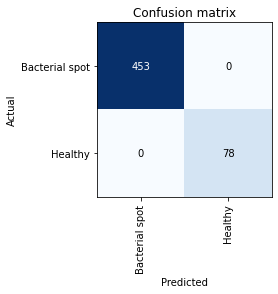

In [21]:
interp.plot_confusion_matrix()

In [22]:
model.export(Path.cwd()/"../models/peach.pkl")

# Cherry

In [25]:
dls_peach =  DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        get_y=parent_label,
        item_tfms=Resize(400),
        batch_tfms=aug_transforms(),
        splitter=RandomSplitter(.2, seed=42)
    )

cherry_path = path/'../Cherry'

cherry = dls_peach.dataloaders(cherry_path)

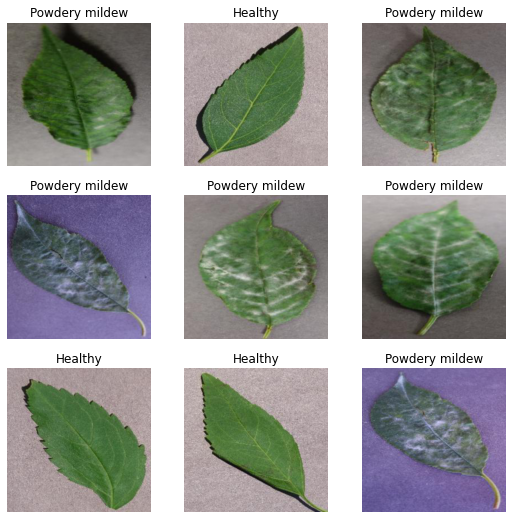

In [26]:
cherry.valid.show_batch()

In [30]:
model = cnn_learner(cherry, resnet18, metrics=[accuracy, error_rate])
model.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.283688,0.103713,0.971129,0.028871,00:23


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.022862,0.004054,0.997375,0.002625,00:27
1,0.009600,0.000315,1.000000,0.000000,00:27
2,0.007020,0.003202,1.000000,0.000000,00:27
3,0.004871,0.000051,1.000000,0.000000,00:27
4,0.003575,0.000246,1.000000,0.000000,00:27
5,0.002267,0.000057,1.000000,0.000000,00:27


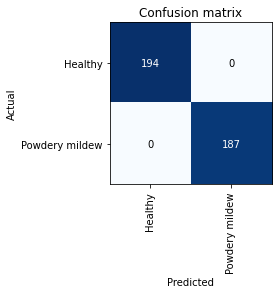

In [31]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [32]:
model.export(Path.cwd()/"../models/cherry.pkl")